In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import datetime as dt
import operator
from sklearn import preprocessing
from sklearn.preprocessing import Imputer 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score 
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

try:
    import sklearn_pandas
except ImportError:
    import pip
    pip.main(['install', '--upgrade', 'sklearn_pandas'])
    import sklearn_pandas
from sklearn_pandas import CategoricalImputer

# LOADING THE DATA

In [56]:
# this file is not clean with some not important featues .  !!!!!!!!!
liver_df = pd.read_csv('dataset/liver_data_inf560.csv')
liver_df.shape

(84603, 159)

# Clean the Data

In [57]:
#remove rows where age<18
liver_df = liver_df.loc[liver_df['AGE'] >=18]
#remove rows where ptime<gtime
liver_df = liver_df.loc[liver_df['GTIME'] < liver_df['PTIME']]
#liver_df = liver_df.loc[liver_df['GTIME'] >90]

post_feature=["BILIARY",
              "COD",
              "COD_OSTXT",
              "COD2",
              "COD2_OSTXT",
              "COD3",
              "COD3_OSTXT",
              "GRF_FAIL_CAUSE_OSTXT",
              "GRF_STAT",
              "HEP_DENOVO",
              "HEP_RECUR",
              "INFECT",
              "PRI_GRF_FAIL",
              "RECUR_DISEASE",
              "REJ_ACUTE",
              "VASC_THROMB",
              "FUNC_STAT_TRF",
              "PX_NON_COMPL",
              "REJ_CHRONIC",
              "DIFFUSE_CHOLANG",
              "HEPATIC_ART_THROM",
              "HEPATIC_OUT_OBS",
              "OTHER_VASC_THROMB",
              "PORTAL_VEIN_THROM",
              "PRI_NON_FUNC",
              "PX_STAT",
              "PSTATUS",
              "PTIME",
              "LOS",
              "ACUTE_REJ_EPI",
              "DIS_ALKPHOS",
              "DIS_SGOT",
              "COMPOSITE_DEATH_DATE",
              "DEATH_DATE",
              "DISCHARGE_DATE",
              "GRF_FAIL_DATE",
              "END_DATE",
              "GSTATUS",
              "GTIME"]
no=['BILIARY', 'COD', 'COD_OSTXT', 'COD2', 'COD2_OSTXT', 'COD3', 'COD3_OSTXT'
 ,'GRF_FAIL_CAUSE_OSTXT', 'HEP_DENOVO', 'HEP_RECUR', 'INFECT' ,'PRI_GRF_FAIL'
 ,'RECUR_DISEASE', 'REJ_ACUTE' ,'VASC_THROMB', 'FUNC_STAT_TRF', 'PX_NON_COMPL'
 ,'REJ_CHRONIC' ,'DIFFUSE_CHOLANG' ,'HEPATIC_ART_THROM', 'HEPATIC_OUT_OBS'
 ,'OTHER_VASC_THROMB' ,'PORTAL_VEIN_THROM' ,'PRI_NON_FUNC' ,'DIS_ALKPHOS'
 ,'DIS_SGOT' ,'COMPOSITE_DEATH_DATE' ,'DEATH_DATE', 'DISCHARGE_DATE'
 ,'GRF_FAIL_DATE', 'END_DATE']
drop_features = list(set(post_feature)-set(no))
print(drop_features)
liver_df=liver_df.drop(['PTIME','PSTATUS', 'GRF_STAT', 'ACUTE_REJ_EPI', 'GTIME', 'LOS', 'PX_STAT'], axis=1)

['GSTATUS', 'GRF_STAT', 'GTIME', 'LOS', 'PX_STAT', 'ACUTE_REJ_EPI', 'PSTATUS', 'PTIME']


In [55]:
print (liver_df)

Index(['NUM_PREV_TX', 'GENDER', 'GENDER_DON', 'ABO', 'ABO_DON', 'ABO_MAT',
       'EDUCATION', 'DIAB', 'DIABETES_DON', 'REM_CD',
       ...
       'TX_YEAR', 'LIST_MELD', 'TX_MELD', 'LT_ONE_WEEK_DON', 'LISTYR',
       'DATA_TRANSPLANT', 'DATA_WAITLIST', 'CTR_CODE', 'OPO_CTR_CODE',
       'LISTING_CTR_CODE'],
      dtype='object', length=152)


# Seperate categorical columns with numerical columns

In [36]:
X_cc = liver_df.select_dtypes(include=['object']).drop(['OPO_CTR_CODE'],axis=1)
print (X_cc.shape)
X_ncf = liver_df.select_dtypes(exclude=['object'])
print (X_ncf.shape)

(39162, 72)
(39162, 79)


# Nan Value:Deal with the missing value in Categorical columns - using Mode

In [37]:
#Categorical Features
imp_cat = CategoricalImputer()
X_cc_noNan = pd.DataFrame(imp_cat.fit_transform(np.array(X_cc)),columns = X_cc.columns)
X_cc_noNan.index = X_cc.index
X_cc_noNan.tail()

,GENDER,GENDER_DON,ABO,ABO_DON,DIABETES_DON,EXC_HCC,EXC_CASE,PERM_STATE,FINAL_DIALYSIS_PRIOR_WEEK,FINAL_MELD_OR_PELD,...,CARDARREST_NEURO,INOTROP_SUPPORT_DON,CDC_RISK_HIV_DON,HISTORY_MI_DON,CORONARY_ANGIO_DON,LIST_MELD,TX_MELD,LT_ONE_WEEK_DON,DATA_TRANSPLANT,DATA_WAITLIST
84595,M,M,O,O,N,non-HCC,No,CA,N,MELD,...,N,N,N,N,N,No,No,N,Y,Y
84596,M,F,A,A1,N,non-HCC,No,TX,N,MELD,...,N,N,N,N,N,No,No,N,Y,Y
84597,M,M,O,A1,N,HCC,No,AL,N,MELD,...,N,Y,N,N,N,No,No,N,Y,Y
84599,F,F,O,O,Y,non-HCC,Yes,NC,N,MELD,...,N,Y,N,N,N,No,No,N,Y,Y
84600,M,M,O,A1,N,non-HCC,No,CA,N,MELD,...,N,N,N,N,N,No,No,N,Y,Y


# Hot Encoding- COVERT  CATEGORACAL TO NUMERICAL FEATURES

In [38]:
X_cfn_noNan=pd.get_dummies(X_cc_noNan)

In [39]:
print(X_cfn_noNan.shape)

(39162, 382)


# Test whether NaN value are all gone

In [40]:
nan_columns = X_cfn_noNan.columns[X_cfn_noNan.isna().any()].tolist()
nan_columns


[]

# Deal with the missing value in Numerical columns - using Median for Integer & Mean for Float

In [41]:
imp_int = Imputer(missing_values=np.nan, strategy='median', axis=0)
X_int = X_ncf.loc[:, X_ncf.dtypes == np.int64]
X_int_noNan = pd.DataFrame(imp_int.fit_transform(X_int))
X_int_noNan.columns = X_int.columns
X_int_noNan.index = X_int.index
X_int_noNan.tail()


,NUM_PREV_TX,ABO_MAT,REM_CD,DAYSWAIT_CHRON,END_STAT,ETHNICITY,ETHCAT,REGION,WL_ID_CODE,TX_PROCEDUR_TY,...,EXC_EVER,AGE,DIAG,DISTANCE,SHARE_TY,DONOR_ID,TX_YEAR,LISTYR,CTR_CODE,LISTING_CTR_CODE
84595,0.0,1.0,4.0,4.0,6240.0,0.0,4.0,9.0,856097.0,701.0,...,0.0,69.0,4204.0,4.0,3.0,298549.0,2016.0,2010.0,14943.0,14943.0
84596,0.0,1.0,4.0,5.0,6225.0,0.0,4.0,3.0,727013.0,701.0,...,1.0,57.0,4204.0,63.0,3.0,382041.0,2016.0,2016.0,11068.0,11068.0
84597,1.0,1.0,4.0,6.0,6223.0,0.0,4.0,5.0,1272793.0,701.0,...,0.0,55.0,4598.0,268.0,3.0,428547.0,2016.0,2011.0,17609.0,17609.0
84599,0.0,1.0,4.0,6.0,6235.0,0.0,5.0,11.0,590655.0,701.0,...,1.0,47.0,4215.0,83.0,3.0,492336.0,2016.0,2005.0,16524.0,16524.0
84600,0.0,1.0,4.0,4.0,6227.0,0.0,4.0,11.0,307316.0,701.0,...,1.0,47.0,4204.0,528.0,3.0,476137.0,2016.0,2015.0,13052.0,13052.0


In [42]:
imp_float = Imputer(missing_values=np.nan, strategy='mean', axis=0)
X_float = X_ncf.loc[:, X_ncf.dtypes == np.float64]
X_float_noNan = pd.DataFrame(imp_float.fit_transform(X_float))
X_float_noNan.columns = X_float.columns
X_float_noNan.index = X_float.index
X_float_noNan.tail()

,EDUCATION,DIAB,ETHCAT_DON,END_BMI_CALC,FINAL_ALBUMIN,FINAL_ASCITES,FINAL_BILIRUBIN,FINAL_ENCEPH,FINAL_INR,FINAL_MELD_PELD_LAB_SCORE,...,ASCITES_TX,MELD_PELD_LAB_SCORE,LITYP,COLD_ISCH,HGT_CM_CALC,WGT_KG_CALC,BMI_CALC,TRANSFUS_TERM_DON,PH_DON,HEMATOCRIT_DON
84595,3.0,1.0,2.0,29.757785,3.0,2.0,5.9,2.0,1.29,23.0,...,2.0,23.0,20.0,6.60,171.0,87.0,29.752744,0.0,7.46,28.1
84596,3.0,1.0,1.0,42.771479,3.0,2.0,2.2,2.0,1.67,33.0,...,3.0,33.0,20.0,7.23,158.5,107.1,42.631532,0.0,7.32,39.2
84597,3.0,2.0,1.0,28.929300,3.1,3.0,1.1,2.0,2.40,35.0,...,3.0,35.0,20.0,5.40,176.3,89.9,28.923781,0.0,7.33,32.8
84599,2.0,1.0,1.0,34.290123,4.2,3.0,30.6,2.0,2.10,35.0,...,1.0,35.0,20.0,7.00,181.0,112.1,34.217515,0.0,7.42,34.7
84600,6.0,1.0,4.0,35.272079,4.1,3.0,2.0,1.0,3.10,39.0,...,2.0,39.0,20.0,6.18,173.7,106.2,35.198559,0.0,7.33,31.0


# Test & Combine float and int

In [43]:
X_ncf_noNan = pd.merge(X_float_noNan, X_int_noNan,left_index=True,right_index=True)
print(X_cfn_noNan.columns[X_cfn_noNan.isna().any()].tolist())
X_ncf_noNan.shape

[]


(39162, 79)

# Preprocess the Data - scaling on non categorical colunms

In [44]:
#Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_ncf_noNan[X_ncf_noNan.columns] = min_max_scaler.fit_transform(X_ncf_noNan[X_ncf_noNan.columns])

# Test & Combine Categorical and Numerical

In [45]:
result = pd.merge(X_ncf_noNan, X_cfn_noNan,left_index=True,right_index=True)
print(result.shape)

(39162, 461)


In [46]:
#result.to_csv('dataset/featuresNumWONaN.csv',encoding='utf-8')
result.tail()

,EDUCATION,DIAB,ETHCAT_DON,END_BMI_CALC,FINAL_ALBUMIN,FINAL_ASCITES,FINAL_BILIRUBIN,FINAL_ENCEPH,FINAL_INR,FINAL_MELD_PELD_LAB_SCORE,...,HISTORY_MI_DON_N,HISTORY_MI_DON_U,HISTORY_MI_DON_Y,CORONARY_ANGIO_DON_N,CORONARY_ANGIO_DON_Y,LIST_MELD_No,TX_MELD_No,LT_ONE_WEEK_DON_N,DATA_TRANSPLANT_Y,DATA_WAITLIST_Y
84595,0.002006,0.000000,0.125,0.328415,0.265957,0.333333,0.060825,0.333333,0.007315,0.314607,...,1,0,0,1,0,1,1,1,1,1
84596,0.002006,0.000000,0.000,0.553402,0.265957,0.333333,0.022680,0.333333,0.011175,0.426966,...,1,0,0,1,0,1,1,1,1,1
84597,0.002006,0.001003,0.000,0.314092,0.276596,0.666667,0.011340,0.333333,0.018592,0.449438,...,1,0,0,1,0,1,1,1,1,1
84599,0.001003,0.000000,0.000,0.406772,0.393617,0.666667,0.315464,0.333333,0.015544,0.449438,...,1,0,0,1,0,1,1,1,1,1
84600,0.005015,0.000000,0.375,0.423749,0.382979,0.666667,0.020619,0.000000,0.025704,0.494382,...,1,0,0,1,0,1,1,1,1,1


# FEATURE SELECTION

In [47]:
y = result[['GSTATUS']]
X = result.loc[:, result.columns != 'GSTATUS']

In [48]:
features_names_all = X.columns.values.tolist()
print(len(features_names_all))

460


# Feature Selection 1 - Univariate Statistics features selection

In [49]:
# determines the relationship between each feature and output(target)
# only the features with highest confidence are selected
# SelectPercentile : 50 % of the features
from sklearn.feature_selection import f_classif

x_train, x_test,y_train,y_test = train_test_split(X,y, test_size = 0.40, random_state=4)

select = SelectPercentile(f_classif,percentile=75)
select.fit(x_train,y_train)
x_train_selected = select.transform(x_train)


/Users/sunaibo/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sunaibo/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [171 195 287 298 299 382 455 456 457 458 459] are constant.
  UserWarning)
/Users/sunaibo/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


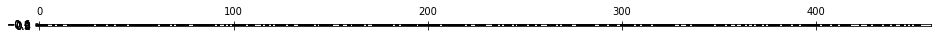

In [50]:
features_name = x_train.columns.values.tolist()
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [51]:
features_SelectPercentile= []
for i in range(0,len(mask)-1):
    if mask[i]==True :
        features_SelectPercentile.append(features_name[i])
print(len(features_SelectPercentile))

345


In [52]:
features_SelectPercentile_0 = list ( set (features_names_all) - set (features_SelectPercentile))
print(len(features_SelectPercentile_0))

115


In [53]:
socre_list = select.scores_.tolist()
feature_score_p = dict(zip(features_name, socre_list))
feature_score_p

{'ABO_A': 1.34389989827786,
 'ABO_A1': 0.15351577699319874,
 'ABO_A1B': 0.22202968671714263,
 'ABO_A2': 3.9512685729531176,
 'ABO_A2B': 0.42086402902436426,
 'ABO_AB': 0.4179885207565322,
 'ABO_B': 0.6886188948657804,
 'ABO_DON_A': 1.9343911339917417,
 'ABO_DON_A1': 0.09585146023202624,
 'ABO_DON_A1B': 0.12391657791888343,
 'ABO_DON_A2': 0.5061440569283958,
 'ABO_DON_A2B': 0.009768316172138511,
 'ABO_DON_AB': 0.010118661367443648,
 'ABO_DON_B': 3.897252229276001,
 'ABO_DON_O': 0.06735013261285534,
 'ABO_MAT': 0.7805625204887409,
 'ABO_O': 3.862290317703899,
 'AGE': 3.1861357156985246,
 'AGE_DON': 165.47387923849715,
 'AGE_GROUP_A': 0.4120757180946445,
 'AGE_GROUP_P': 0.4120757177434358,
 'ALBUMIN_TX': 68.95666027106124,
 'ANTIHYPE_DON_N': 0.11117985950984793,
 'ANTIHYPE_DON_U': 0.5118188937965129,
 'ANTIHYPE_DON_Y': 0.07395201687921271,
 'ARGININE_DON_N': 0.084044993123463,
 'ARGININE_DON_U': 0.07000020002804885,
 'ARGININE_DON_Y': 0.07215126146179625,
 'ARTIFICIAL_LI_TRR': 1.195584598

# Feature Selection 2 - Model-Based Feature selection

# Cross Validation for Accuracy Improvement  - RandomForestClassifier

In [25]:
# search for an optimal value of n_estimators for Random Forest
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=4)
est_range_class = range(1,40)
est_scores_class = []

for i in est_range_class:
    RFC_model = RFC(n_estimators=i, random_state=42)
    RFC_model.fit(x_train,y_train.values.ravel())
    y_predict = RFC_model.predict(x_test)
    score=roc_auc_score(y_test,y_predict)
    est_scores_class.append(score)

it seems number 5 is the optimal n_estimators parameter for RandomForestClassifier


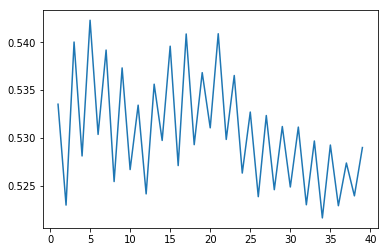

In [26]:
plt.plot(est_range_class,est_scores_class)
print('it seems number',(est_scores_class.index(max(est_scores_class))+1),'is the optimal n_estimators parameter for RandomForestClassifier')

/Users/sunaibo/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


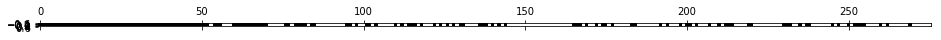

In [27]:
#RandomForestClassifier & selectFromModel
select_model = SelectFromModel(RFC(n_estimators=5, random_state=42), threshold = 'median')
select_model.fit(x_train,y_train)
x_train_model = select_model.transform(x_train)
mask_model = select_model.get_support()
plt.matshow(mask_model.reshape(1,-1), cmap='gray_r')

In [28]:
features_Selectmodel= []
for i in range(0,len(mask_model)-1):
    if mask_model[i]==True :
        features_Selectmodel.append(features_name[i])
print(len(features_Selectmodel))

138


In [29]:
features_Selectmodel_0 =list  ( set (features_names_all) - set (features_Selectmodel))
len(features_Selectmodel_0)

138

In [30]:
socre_list_M = select.scores_.tolist()
feature_score_M = dict(zip(features_name, socre_list_M))
feature_score_M

{'ABO_A': 1.34389989827786,
 'ABO_A1': 0.15351577699319874,
 'ABO_A1B': 0.22202968671714263,
 'ABO_A2': 3.9512685729531176,
 'ABO_A2B': 0.42086402902436426,
 'ABO_AB': 0.4179885207565322,
 'ABO_B': 0.6886188948657804,
 'ABO_DON_A': 1.9343911339917417,
 'ABO_DON_A1': 0.09585146023202624,
 'ABO_DON_A1B': 0.12391657791888343,
 'ABO_DON_A2': 0.5061440569283958,
 'ABO_DON_A2B': 0.009768316172138511,
 'ABO_DON_AB': 0.010118661367443648,
 'ABO_DON_B': 3.897252229276001,
 'ABO_DON_O': 0.06735013261285534,
 'ABO_MAT': 0.7805625204887409,
 'ABO_O': 3.862290317703899,
 'AGE': 3.1861357156985246,
 'AGE_DON': 165.47387923849715,
 'AGE_GROUP_A': 0.4120757180946445,
 'AGE_GROUP_P': 0.4120757177434358,
 'ALBUMIN_TX': 68.95666027106124,
 'ANTIHYPE_DON_N': 0.11117985950984793,
 'ANTIHYPE_DON_U': 0.5118188937965129,
 'ANTIHYPE_DON_Y': 0.07395201687921271,
 'ARTIFICIAL_LI_TRR': 1.1955845980223694,
 'ASCITES_TX': 0.2595291499841728,
 'BLOOD_INF_DON': 2.1312812428132624,
 'BMI_CALC': 16.94955215300023,
 'BM

# Common Critical Features selected by 2 methods 

In [31]:
#features_1_name = features_1.index.values.tolist()
common_features = set(features_SelectPercentile) & set(features_Selectmodel)
print('There are total',len(common_features),'common features')
common_features

There are total 109 common features


{'ABO_A',
 'ABO_B',
 'ABO_DON_A',
 'ABO_DON_B',
 'ABO_MAT',
 'ABO_O',
 'AGE',
 'AGE_DON',
 'ALBUMIN_TX',
 'ASCITES_TX',
 'BLOOD_INF_DON',
 'BMI_CALC',
 'BMI_DON_CALC',
 'BUN_DON',
 'CANCER_SITE_DON',
 'CLIN_INFECT_DON_N',
 'CLIN_INFECT_DON_Y',
 'CMV_DON_N',
 'CMV_DON_P',
 'CMV_IGM_N',
 'CMV_IGM_ND',
 'CMV_STATUS_N',
 'CMV_STATUS_P',
 'COD_CAD_DON',
 'COLD_ISCH',
 'CORONARY_ANGIO_DON_N',
 'CREAT_DON',
 'CREAT_TX',
 'DA1',
 'DA2',
 'DAYSWAIT_CHRON',
 'DB1',
 'DB2',
 'DDAVP_DON_N',
 'DDAVP_DON_Y',
 'DDR1',
 'DDR2',
 'DEATH_CIRCUM_DON',
 'DEATH_MECH_DON',
 'DIAB',
 'DONOR_ID',
 'EBV_SEROSTATUS_N',
 'EBV_SEROSTATUS_P',
 'ENCEPH_TX',
 'END_BMI_CALC',
 'END_STAT',
 'EXC_CASE_No',
 'EXC_CASE_Yes',
 'EXC_HCC_HCC',
 'EXC_HCC_non-HCC',
 'FINAL_ALBUMIN',
 'FINAL_DIALYSIS_PRIOR_WEEK_N',
 'FINAL_DIALYSIS_PRIOR_WEEK_Y',
 'FINAL_ENCEPH',
 'FINAL_INR',
 'FINAL_SERUM_CREAT',
 'FINAL_SERUM_SODIUM',
 'FUNC_STAT_TRR',
 'GENDER_DON_F',
 'GENDER_DON_M',
 'HBV_CORE_N',
 'HBV_CORE_P',
 'HCV_SEROSTATUS_N',
 'HC

# Feature importance Visualization

In [32]:
feature_score_p_common = { your_key: feature_score_p[your_key] for your_key in common_features }
feature_score_M_common = { your_key: feature_score_M[your_key] for your_key in common_features }
feature_score_M_common

{'ABO_A': 1.34389989827786,
 'ABO_B': 0.6886188948657804,
 'ABO_DON_A': 1.9343911339917417,
 'ABO_DON_B': 3.897252229276001,
 'ABO_MAT': 0.7805625204887409,
 'ABO_O': 3.862290317703899,
 'AGE': 3.1861357156985246,
 'AGE_DON': 165.47387923849715,
 'ALBUMIN_TX': 68.95666027106124,
 'ASCITES_TX': 0.2595291499841728,
 'BLOOD_INF_DON': 2.1312812428132624,
 'BMI_CALC': 16.94955215300023,
 'BMI_DON_CALC': 4.3831579609202445,
 'BUN_DON': 1.7629806327110484,
 'CANCER_SITE_DON': 1.0548618918204875,
 'CLIN_INFECT_DON_N': 3.3146372688053862,
 'CLIN_INFECT_DON_Y': 3.0379388079810523,
 'CMV_DON_N': 5.378084572433914,
 'CMV_DON_P': 5.650248326689169,
 'CMV_IGM_N': 0.47670246707701686,
 'CMV_IGM_ND': 4.461506926317786,
 'CMV_STATUS_N': 2.600883526021024,
 'CMV_STATUS_P': 1.2663489593089916,
 'COD_CAD_DON': 0.7057244239383454,
 'COLD_ISCH': 1.5779817338829207,
 'CORONARY_ANGIO_DON_N': 3.8690537185717604,
 'CREAT_DON': 0.9517202585978883,
 'CREAT_TX': 33.36623728960544,
 'DA1': 0.34935547599633393,
 'DA

In [33]:
feature_score_avearage={}
for key in common_features:
    feature_score_avearage[key] = (feature_score_M_common[key]+feature_score_p_common[key])/2

feature_score_avearage_20 = sorted(feature_score_avearage.items(), reverse=True, key=lambda item: item[1])[0:20]
feature_score_dic_20=dict(feature_score_avearage_20)
feature_score_20 = sorted(feature_score_dic_20.items(), key=lambda item: item[1])
feature_score_20=dict(feature_score_20)
feature_score_20


{'AGE_DON': 165.47387923849715,
 'ALBUMIN_TX': 68.95666027106124,
 'BMI_CALC': 16.94955215300023,
 'CMV_DON_N': 5.378084572433914,
 'CMV_DON_P': 5.650248326689169,
 'CREAT_TX': 33.36623728960544,
 'DAYSWAIT_CHRON': 46.06726822450273,
 'DDAVP_DON_N': 20.461944447292506,
 'DDAVP_DON_Y': 17.80489853791217,
 'ENCEPH_TX': 5.107871665529538,
 'END_BMI_CALC': 16.833424802744453,
 'HEMATOCRIT_DON': 48.51640739393409,
 'HGT_CM_CALC': 13.532684296349377,
 'HGT_CM_DON_CALC': 19.23990491763575,
 'NON_HRT_DON_N': 9.367765941356426,
 'PREV_TX_N': 202.26447621325642,
 'PREV_TX_Y': 202.26447621324857,
 'PT_T4_DON_Y': 5.962707380197343,
 'TX_YEAR': 2195.17470323355,
 'WGT_KG_DON_CALC': 16.67481650785612}

In [59]:
# Save a dictionary into a pickle file.
import pickle

feature_save_20 = {'AGE_DON': 165.47387923849715,
 'ALBUMIN_TX': 68.95666027106124,
 'BMI_CALC': 16.94955215300023,
 'CMV_DON_N': 5.378084572433914,
 'CMV_DON_P': 5.650248326689169,
 'CREAT_TX': 33.36623728960544,
 'DAYSWAIT_CHRON': 46.06726822450273,
 'DDAVP_DON_N': 20.461944447292506,
 'DDAVP_DON_Y': 17.80489853791217,
 'ENCEPH_TX': 5.107871665529538,
 'END_BMI_CALC': 16.833424802744453,
 'HEMATOCRIT_DON': 48.51640739393409,
 'HGT_CM_CALC': 13.532684296349377,
 'HGT_CM_DON_CALC': 19.23990491763575,
 'NON_HRT_DON_N': 9.367765941356426,
 'PREV_TX_N': 202.26447621325642,
 'PREV_TX_Y': 202.26447621324857,
 'PT_T4_DON_Y': 5.962707380197343,
 'TX_YEAR': 2195.17470323355,
 'WGT_KG_DON_CALC': 16.67481650785612}
pickle.dump( feature_save_20, open( "topfeatures.p", "wb" ) )

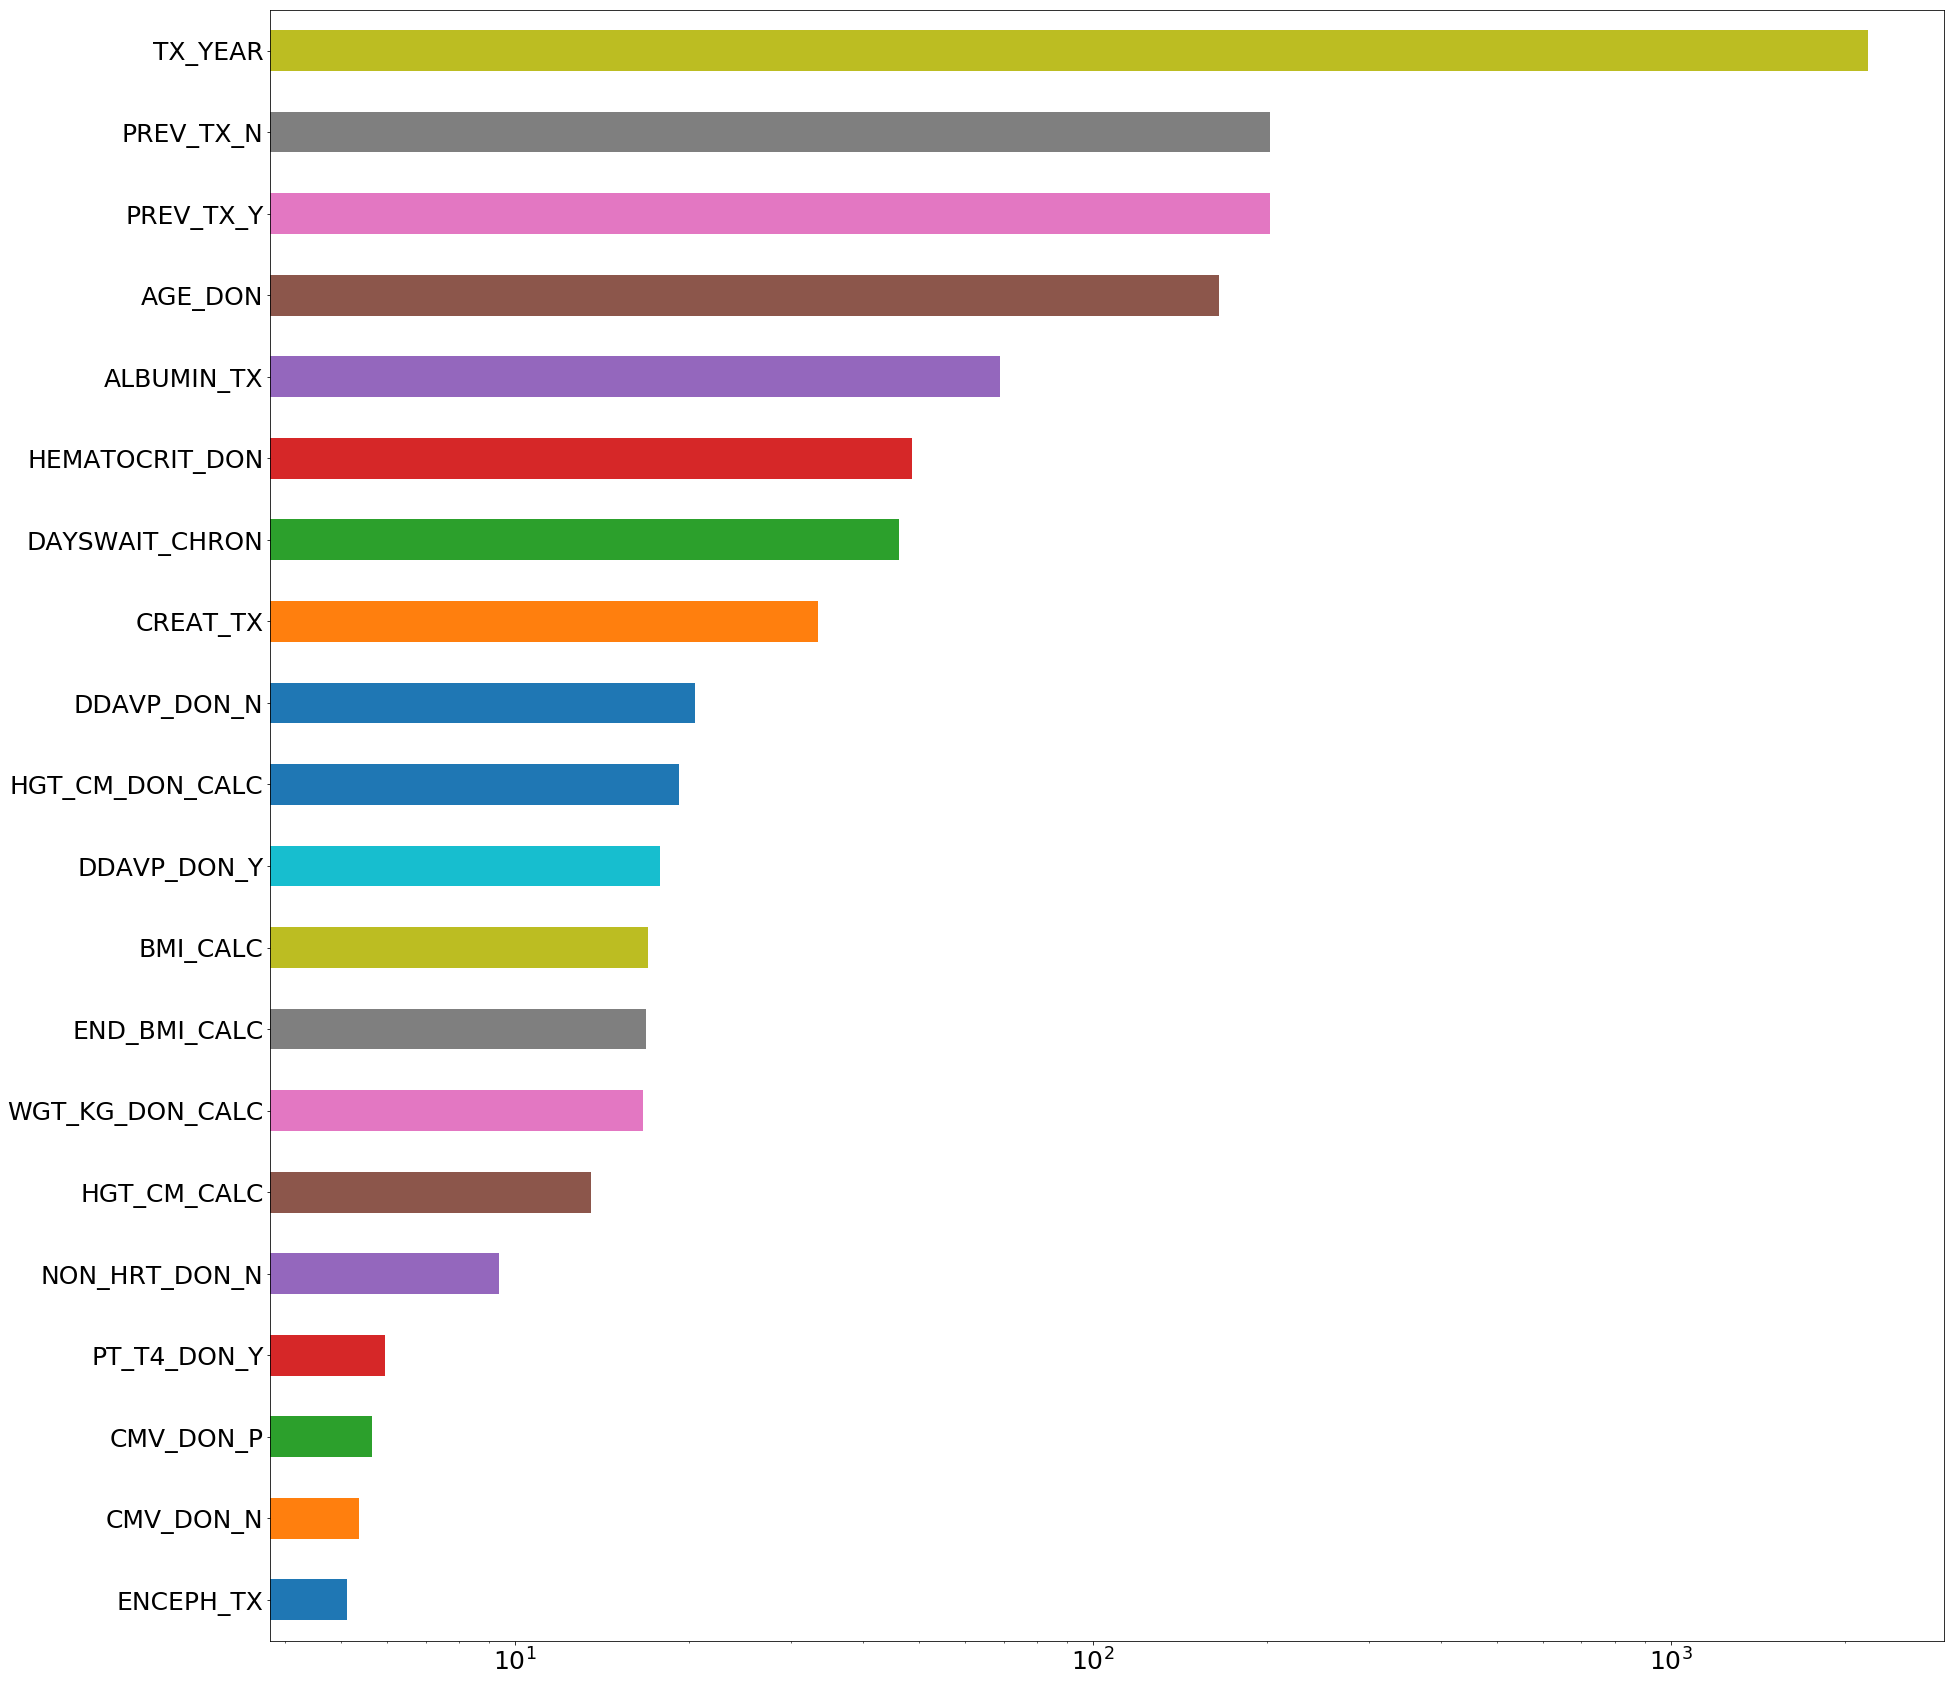

In [34]:
feature_plot = pd.Series(list(feature_score_20.values()), index=list(feature_score_20.keys()))
feature_plot.plot(kind='barh', figsize =(30,30), logx= True,fontsize=25)

# Common  Features selected with no importance by 2 methods 

In [35]:
common_features_0 = list(set(features_SelectPercentile_0) & set(features_Selectmodel_0))
print('There are total',len(common_features_0),'common features with 0 importance')
common_features_0.sort()

There are total 40 common features with 0 importance


In [36]:
common_features_0

['ABO_DON_A2B',
 'ABO_DON_AB',
 'ANTIHYPE_DON_Y',
 'CARDARREST_NEURO_N',
 'CARDARREST_NEURO_Y',
 'CDC_RISK_HIV_DON_U',
 'CLIN_INFECT_DON_U',
 'DATA_TRANSPLANT_Y',
 'DATA_WAITLIST_Y',
 'DIABETES_DON_U',
 'DIAL_TX_N',
 'DIAL_TX_Y',
 'EXTRACRANIAL_CANCER_DON_Y',
 'HBV_CORE_DON.1_U',
 'HBV_CORE_DON_I',
 'HBV_CORE_ND',
 'HBV_CORE_U',
 'HBV_SUR_ANTIGEN_DON_C',
 'HBV_SUR_ANTIGEN_DON_I',
 'HCV_SEROSTATUS_ND',
 'HEP_C_ANTI_DON_C',
 'HEP_C_ANTI_DON_I',
 'HISTORY_MI_DON_N',
 'HIST_CANCER_DON_U',
 'HIST_OTH_DRUG_DON_U',
 'HIV_SEROSTATUS_ND',
 'HIV_SEROSTATUS_P',
 'INSULIN_DON_Y',
 'LIFE_SUP_TRR_N',
 'LIFE_SUP_TRR_Y',
 'LIST_MELD_No',
 'LT_ONE_WEEK_DON_N',
 'MALIG_TRR_Y',
 'PT_T3_DON_N',
 'PT_T3_DON_Y',
 'SKIN_CANCER_DON_N',
 'TXLIV_S',
 'TXLIV_W',
 'TX_MELD_No',
 'VDRL_DON_I']